# Classifying Rice Species Using K-Nearest Neighbors Model and its Accuracy

## Introduction

Rice is one of the most popular grain products in the world and it plays an important role in both nutrition and cultural and regional agriculture. There are many species of rice that are grown in different countries and different species can be distinguished by many characteristics such as physical properties, cooking features, taste, and others. These characteristics are usually used for quality criteria examination or determination of various types. However, it might be inefficient to proceed using some of these characteristics. Therefore, according to many studies, physical properties are found to be useful and less time-consuming.

In our project, we will concentrate on the prediction of different rice types based on information on the appearance of the rice and its accuracy. We will focus on two rice species in Turkey—Osmancik and Cammeo—as well as several physical properties of each species. In general, these two species are distinct in shape, texture, and color. This thus poses the question:

**What is the classification accuracy of using the K-Nearest Neighbors model to predict that rice is Osmancik or Cammeo?**

We will seek to answer this question by using the Rice (Cammeo and Osmancik) Data Set. This data set includes certified rice samples in both species collected by Ilkay Cinar and Murat Koklu in Turkey. The data was obtained and calculated by taking images of the two species. It contains seven numeric variables: Area, Perimeter, Major Axis Length, Minor Axis Length, Eccentricity, Convex Area, and Extent, and one categorical variable: Class.

## Methods & Results

Since we want to predict whether the rice in our data set is either Osmancik or Cammeo, we are going to performing classification.

First we import the packages we will be using to code.

In [2]:
# Import packages
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Then, we will read the data.

In [3]:
url = "https://www.muratkoklu.com/datasets/vtdhnd03.php"
dataset = "rice_dataset.xlsx"
download.file(url, dataset)
rice <- read_excel("rice_dataset.xlsx")
head(rice)
any(is.na(rice))

AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
15231,525.579,229.7499,85.09379,0.9288820,15617,0.5728955,Cammeo
14656,494.311,206.0201,91.73097,0.8954050,15072,0.6154363,Cammeo
14634,501.122,214.1068,87.76829,0.9121181,14954,0.6932588,Cammeo
13176,458.343,193.3374,87.44839,0.8918609,13368,0.6406690,Cammeo
14688,507.167,211.7434,89.31245,0.9066909,15262,0.6460239,Cammeo
13479,477.016,200.0531,86.65029,0.9013283,13786,0.6578973,Cammeo


[1] FALSE

We see that there are no NA values in our variables and it looks like our data is already tidy. 


Now, we want to determine which predictors we want to use to train our classifier. A great way to visualize how each variable relates to each other is to graph everything.

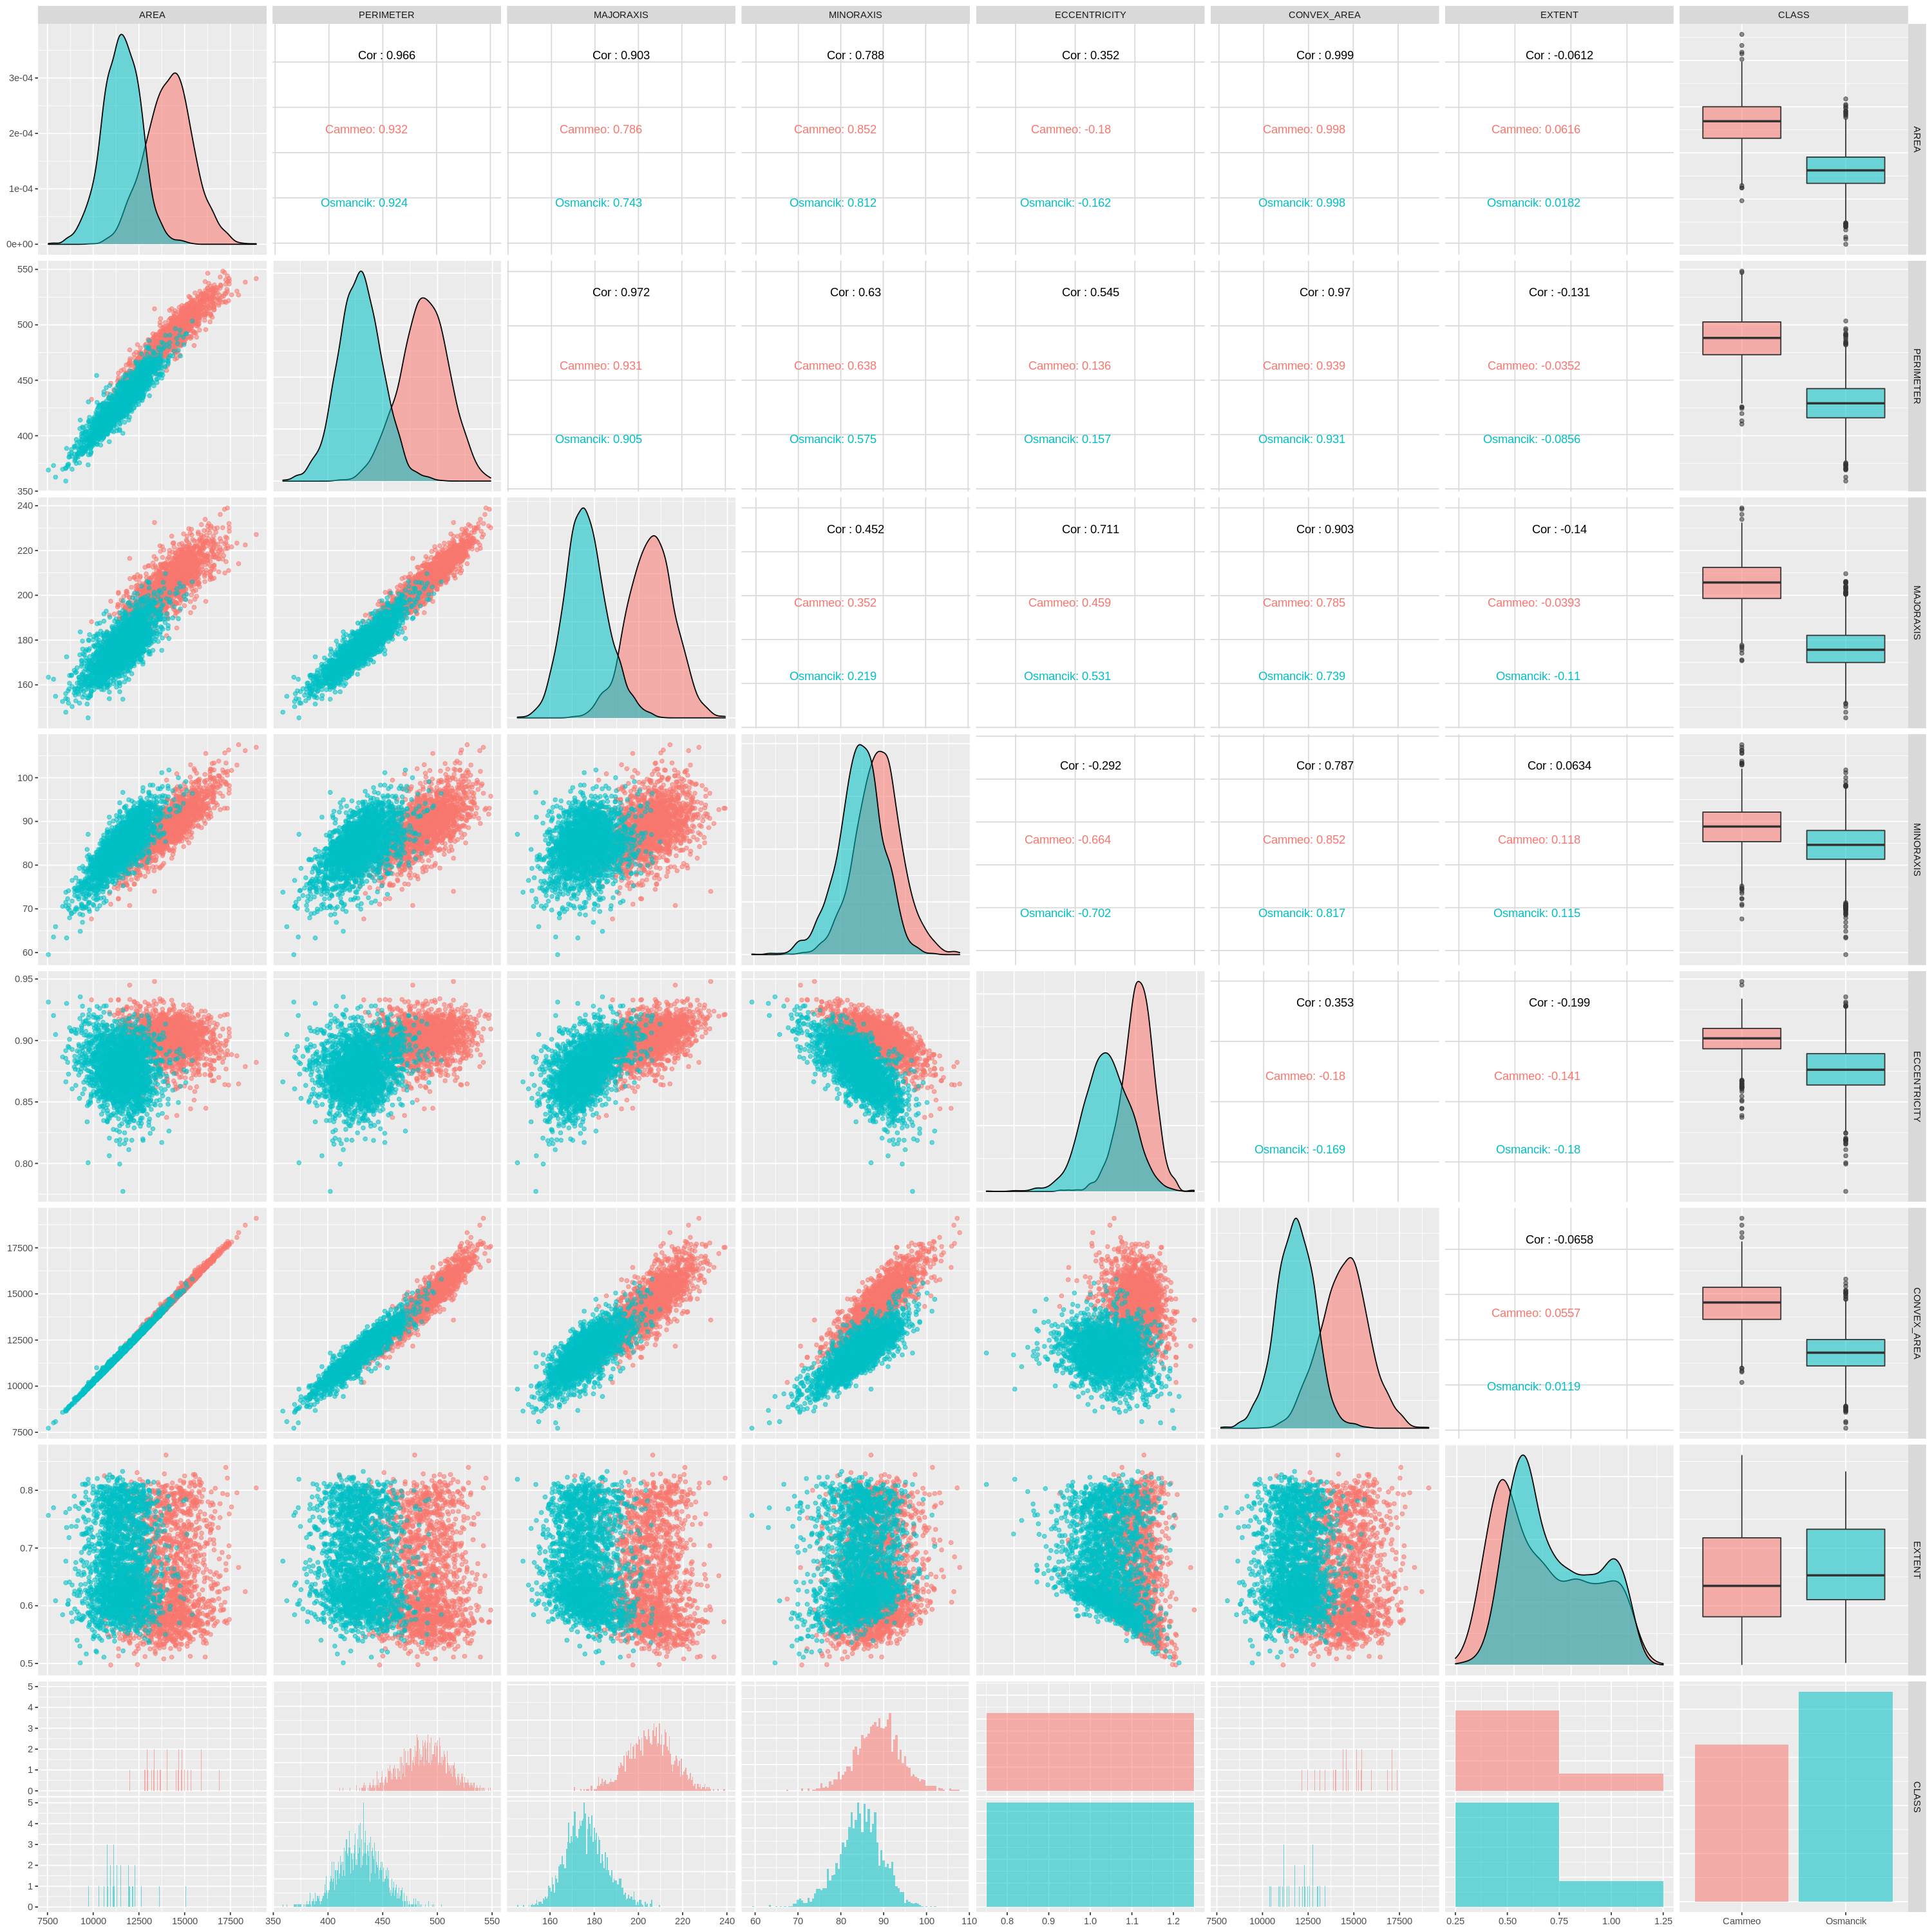

In [10]:
options(repr.plot.width=25, repr.plot.height=25)
rice_pairs <- rice %>%
    ggpairs(mapping = ggplot2::aes(colour = CLASS, alpha = 0.4), lower=list(combo=wrap("facethist", binwidth=0.5)))
rice_pairs

Here, we have colour coded blue to Osmancik and red to Cammeo. For the distribution graphs, we notice that EXTENT, MINORAXIS and ECCENTRICITY are both overlapping more than the other variables. This suggests that Cammeo and Osmancik rice generally have a similar EXTENT, MINORAXIS and ECCENTRICITY. On the otherhand, PERIMETER and MAJORAXIS both have lots of separation between Osmancik and Cammeo. Looking at the two distinct variable graphs, we continue to see that EXTENT, MINORAXIS, and ECCENTRICITY overlaps with other variables more than other variables, which suggests that they do not have correlation. Therefore, we can exclude EXTENT, MINORAXIS and ECCENTRICITY because they will be less useful in predicting whether the rice is Osmancik or Cammeo. If we compare AREA, PERIMETER, MAJORAXIS, and CONVEX_AREA, we can see positive correlations and less overlapping. Thus, using these four variables as predictors seems to be most suitable for our analysis.

Next, we will factor the CLASS variable and split our data into our training and testing sets.

In [11]:
set.seed(1)
rice_data <- mutate(rice, CLASS = as_factor(CLASS))
rice_split <- initial_split(rice_data, prop = 0.75, strata = CLASS)
rice_train <- training(rice_split)
rice_test <- testing(rice_split)

Then, we will create our recipe. Each qualitative variable has a different range in values. For instance, AREA is in the ten-thousands whereas PERIMETER appears to be around five hundred. Therefore, we will standardize our data so that each variable has an equal weight. 

In [14]:
rice_recipe <- recipe(CLASS ~ AREA + PERIMETER + MAJORAXIS + CONVEX_AREA, data = rice_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
rice_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()